In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Logistic growth

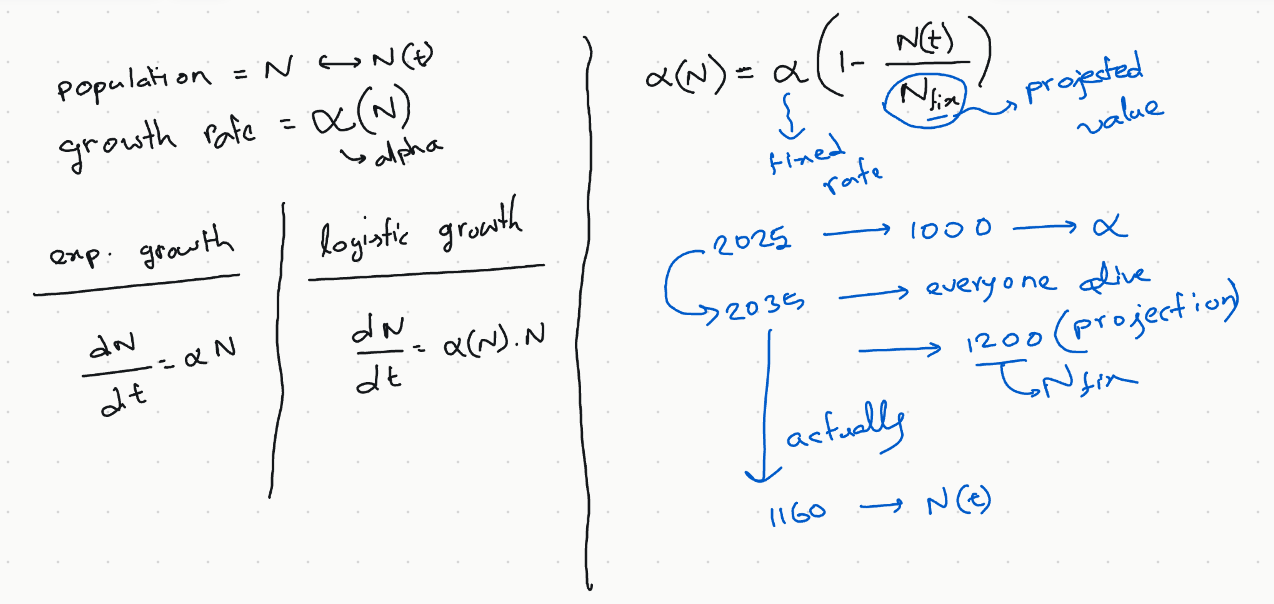

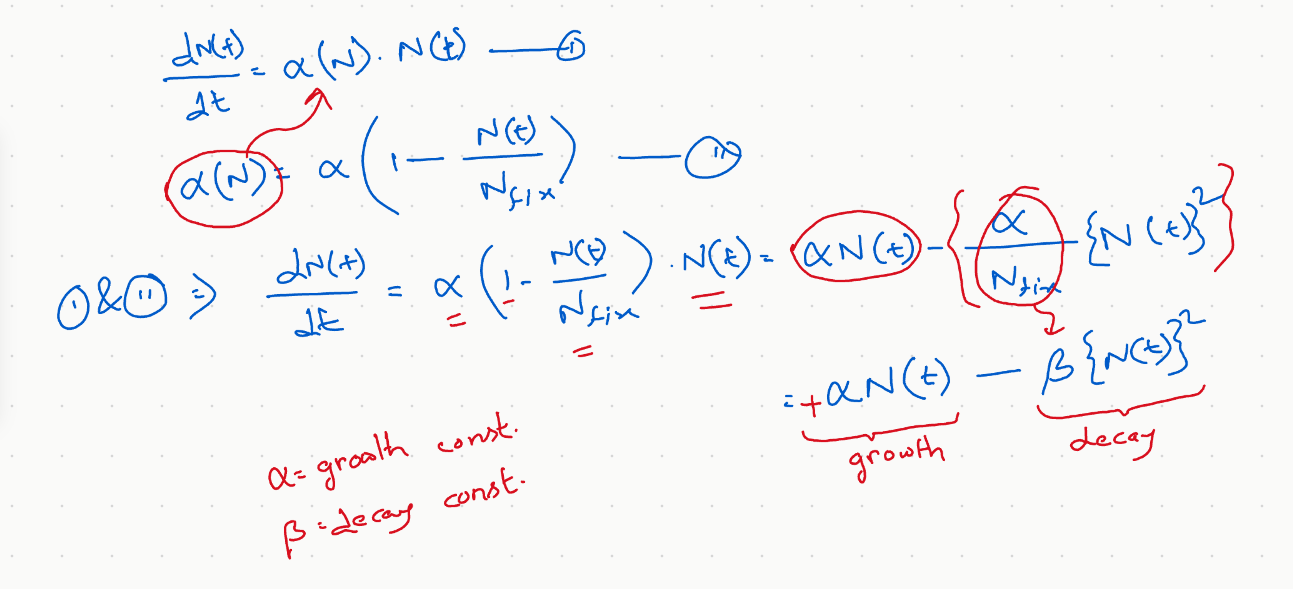

**Logistic growth model**

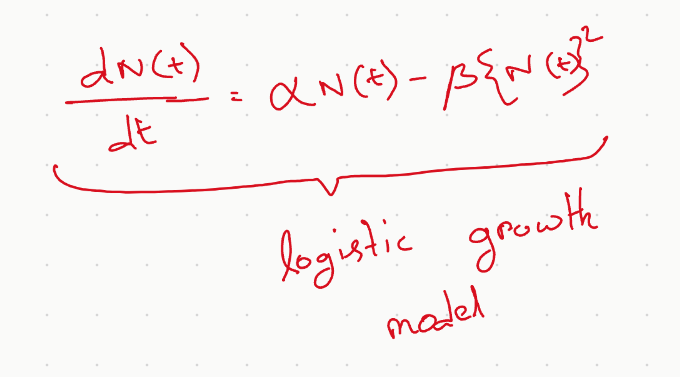

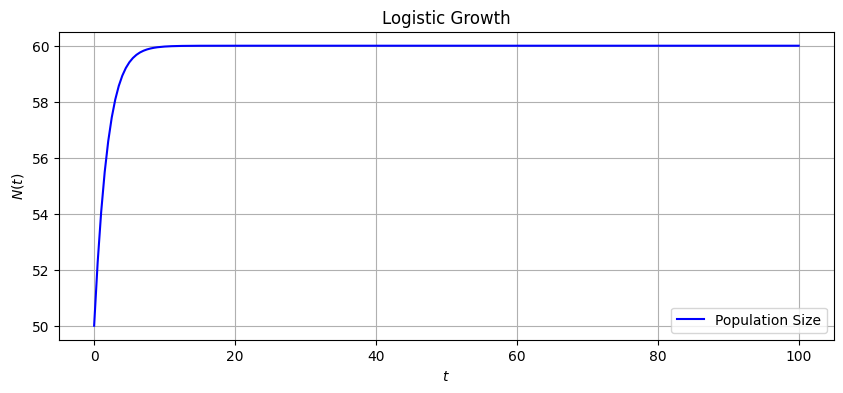

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# constant and specific growth rate
alpha = 0.6
# parameter describing intraspecific competition (beta1 * beta2 = Probability to meet * Probability to influence)
beta = 0.01


# defining initial value
Ninit = 50


# define the logistic growth func
def logisticGrowth(X, t):
    N = X[0] # can be written as N, = X also
    dNdt = alpha*N - beta*N*N
    return [dNdt]



# defining the simulation time
t = np.linspace(0, 100, 201)
sol = odeint(logisticGrowth,Ninit,t) # odeint(function, initial_value, time_array)
N = sol[:,0] # can be written as N, = sol.T also



plt.figure(figsize=(10,4))
#plt.plot(t,N,color='b',label='Population Size',linewidth=1)
plt.plot(t, N, '-b', label='Population Size', linewidth=1.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$N(t)$')
plt.title('Logistic Growth')
plt.grid()
plt.legend(loc = 'best')
plt.savefig('Logistic_Growth.jpg',dpi=300)
plt.show()

# Exercise

**Make the interactive plot where alpha and beta both can be changed**

# Predator-Prey Model

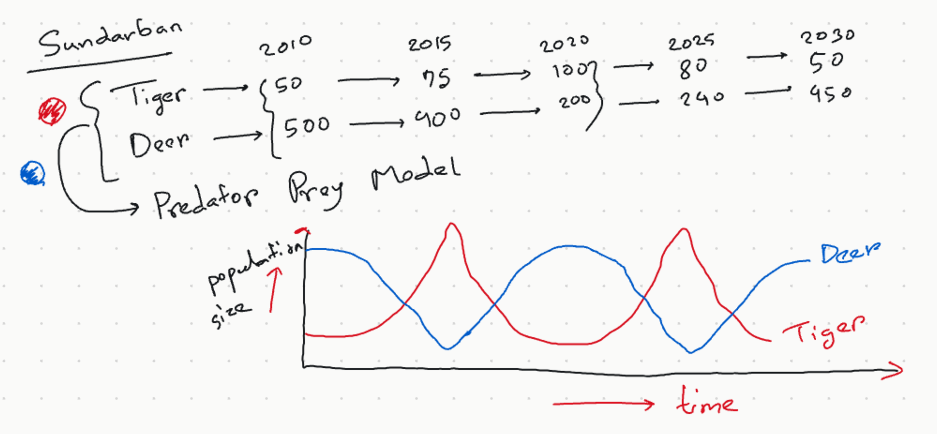

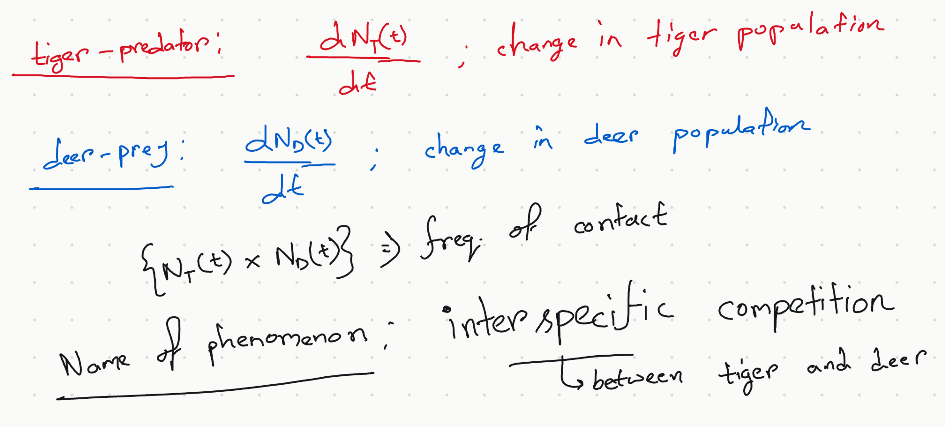

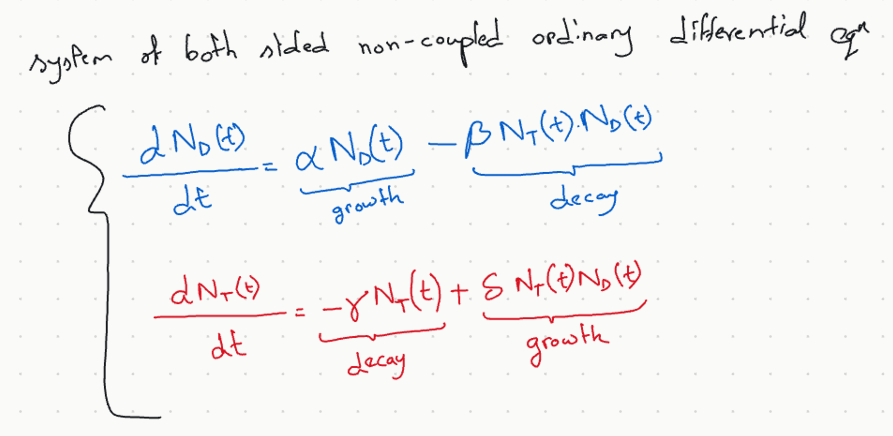

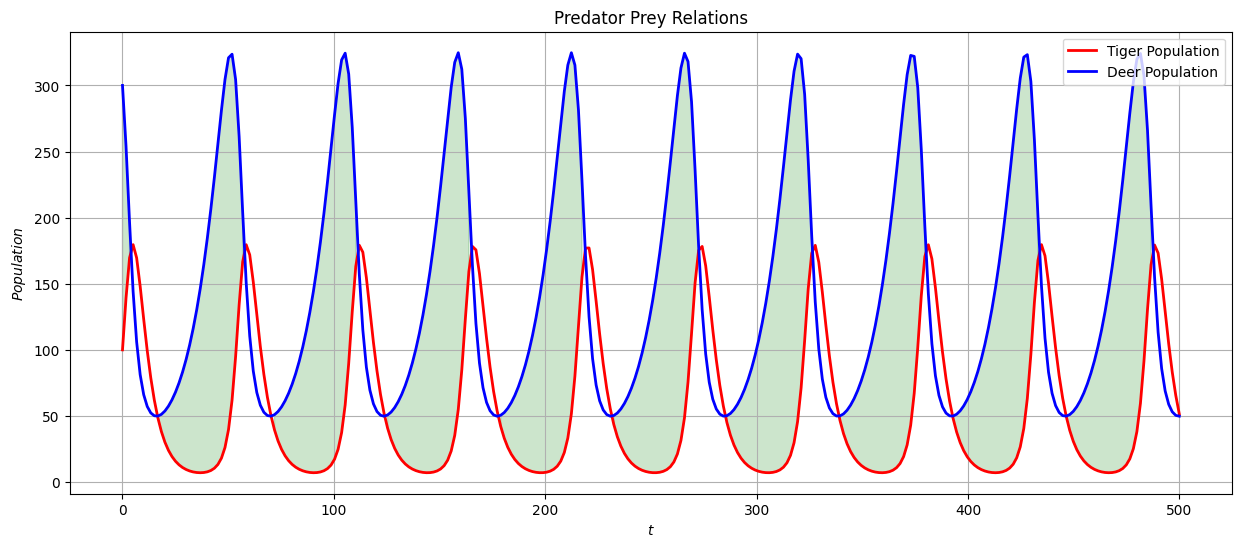

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# parameters for predatorPrey
alpha    = 0.08
beta     = 0.0015
gamma    = 0.22
delta    = 0.0015


def predatorPrey(X,t):
#   Nprey = X[0]
#   Npred = X[1]
    
    Nprey, Npred = X
    
    dNpreydt = alpha*Nprey - beta*Nprey*Npred 
    dNpreddt = -gamma*Npred + delta*Nprey*Npred
    
    return [dNpreydt, dNpreddt]

# initial number of animals [300 deers, 100 tigers]
PredPreyInit = [300, 100]


t = np.linspace(0,500,501)
sol = odeint(predatorPrey, PredPreyInit, t)
Nprey, Npred = sol.T
#Nprey = sol[:, 0]
#Npred = sol[:, 1]


plt.figure(figsize=(15,6))
plt.plot(t, Npred, 'r', linewidth=2, label='Tiger Population')
plt.plot(t, Nprey, 'b', linewidth=2, label='Deer Population')
plt.xlabel(r'$t$')
plt.ylabel(r'$Population$')
plt.title('Predator Prey Relations')
plt.fill_between(t, Nprey, Npred, where = Nprey>Npred, color='green', alpha=0.2)
plt.grid()
plt.legend(loc='best')
plt.show()

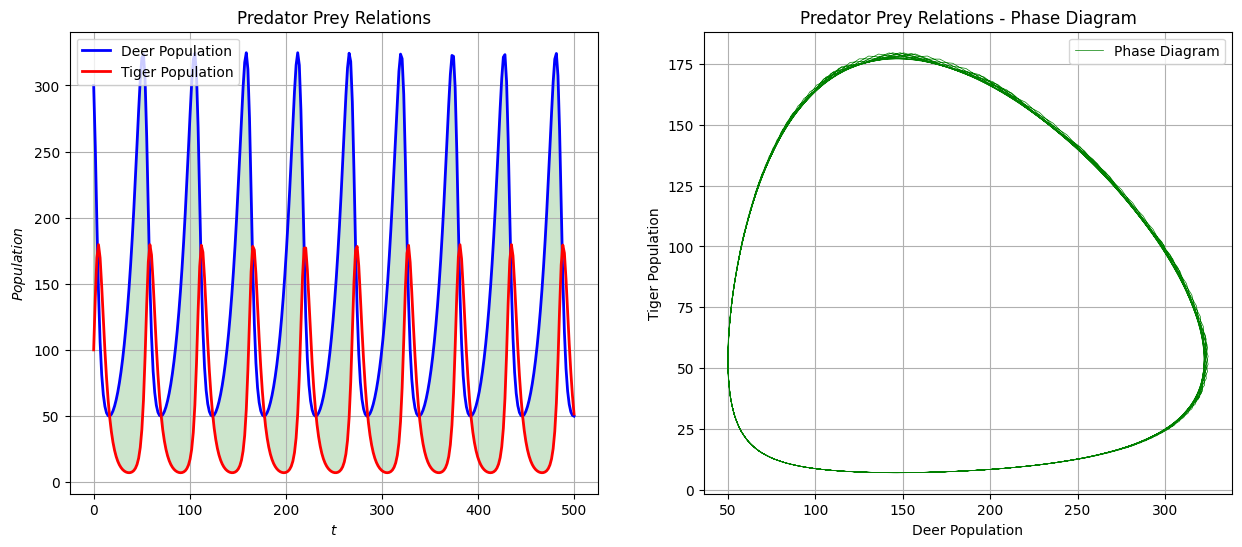

In [13]:
# Plotting with phase diagram

# previous predator-prey population plot
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1) # best idea for subplotting; you can forget using ax at this point
plt.plot(t, Nprey, 'b', linewidth=2, label='Deer Population')
plt.plot(t, Npred, 'r', linewidth=2, label='Tiger Population')
plt.xlabel(r'$t$')
plt.ylabel(r'$Population$')
plt.title('Predator Prey Relations')
plt.fill_between(t, Nprey, Npred, where = Nprey>Npred, color='green', alpha=0.2)
plt.grid()
plt.legend(loc='best')

# predator-prey phase diagram
plt.subplot(1, 2, 2)
plt.plot(Nprey, Npred, 'g', linewidth=0.5, label='Phase Diagram')
plt.xlabel('Deer Population')
plt.ylabel('Tiger Population')
plt.title('Predator Prey Relations - Phase Diagram')
plt.grid() 
plt.legend(loc='best')

plt.show()